In [ ]:
!pip install transformers
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 77.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 115.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.5 MB/s eta 0:00:

In [ ]:
import torch
from transformers import BertForSequenceClassification, BertTokenizer, BertConfig, TrainingArguments,Trainer,BertModel
from datasets import load_dataset, load_metric
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import AdamW, get_linear_schedule_with_warmup
import torch
import numpy as np
from datasets import load_dataset, load_metric

In [ ]:
from transformers import BertConfig, BertModel

# Load the existing configuration file for BERT base uncased
config = BertConfig.from_pretrained('bert-base-uncased')

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Dataset glue downloaded and prepared to /root/.cache/huggingface/datasets/glue/sst2/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Epoch 1 - Avg Train Loss: 0.5595
Epoch 1 - Accuracy: 69.36%
Avg Eval Loss: 0.4374
Accuracy: 79.59%

Epoch 2 - Avg Train Loss: 0.3089
Epoch 2 - Accuracy: 87.35%
Avg Eval Loss: 0.4170
Accuracy: 81.88%

Epoch 3 - Avg Train Loss: 0.2383
Epoch 3 - Accuracy: 90.60%
Avg Eval Loss: 0.4649
Accuracy: 80.85%

Epoch 4 - Avg Train Loss: 0.2070
Epoch 4 - Accuracy: 92.05%
Avg Eval Loss: 0.4466
Accuracy: 80.73%

Epoch 5 - Avg Train Loss: 0.1859
Epoch 5 - Accuracy: 92.93%
Avg Eval Loss: 0.5277
Accuracy: 79.93%

Epoch 6 - Avg Train Loss: 0.1709
Epoch 6 - Accuracy: 93.58%
Avg Eval Loss: 0.6026
Accuracy: 79.59%

Epoch 7 - Avg Train Loss: 0.1577
Epoch 7 - Accuracy: 94.14%
Avg Eval Loss: 0.5987
Accuracy: 79.36%

Epoch 8 - Avg Train Loss: 0.1463
Epoch 8 - Accuracy: 94.54%
Avg Eval Loss: 0.6116
Accuracy: 79.36%

Epoch 9 - Avg Train Loss: 0.1351
Epoch 9 - Accuracy: 94.92%
Avg Eval Loss: 0.6850
Accuracy: 78.67%

Epoch 10 - Avg Train Loss: 0.1237
Epoch 10 - Accuracy: 95.32%
Avg Eval Loss: 0.7483
Accuracy: 77.75%

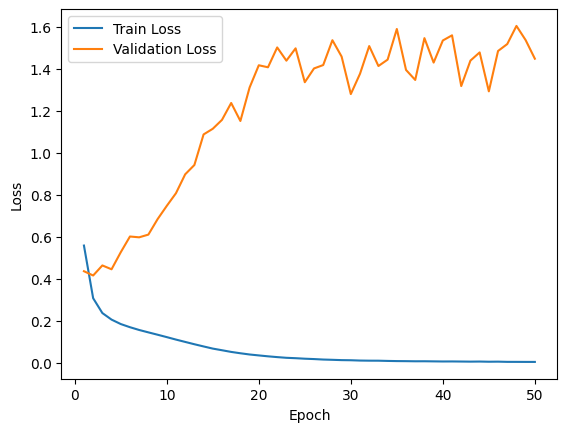

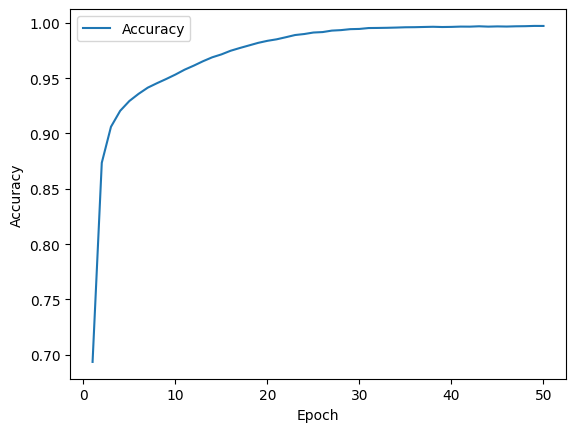

In [ ]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from transformers import BertConfig, BertForSequenceClassification, BertTokenizer, BertForMaskedLM
from datasets import load_dataset
from transformers import BertTokenizer
from datasets import load_dataset, Dataset

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
dataset = load_dataset('glue', 'sst2')

train_dataset = dataset['train']
val_dataset = dataset['validation']
test_dataset = dataset['test']

train_dataset = train_dataset.map(lambda examples: {
    'input_ids': tokenizer(examples['sentence'], padding='max_length', truncation=True)['input_ids'],
    'labels': examples['label']
}, batched=True)

val_dataset = val_dataset.map(lambda examples: {
    'input_ids': tokenizer(examples['sentence'], padding='max_length', truncation=True)['input_ids'],
    'labels': examples['label']
}, batched=True)

# Define the configuration for the smaller model
config = BertConfig(
    hidden_size=256,  # Decrease the hidden size
    num_attention_heads=4,  # Reduce the number of attention heads
    num_hidden_layers=4,  # Reduce the number of hidden layers
    intermediate_size=1024,  # Adjust the intermediate size accordingly
    hidden_dropout_prob=0.2,
    attention_probs_dropout_prob=0.2
)

# Create the smaller BERT model
model = BertForMaskedLM(config)

# Create the model architecture for sequence classification
model = BertForSequenceClassification(config)

train_encodings = tokenizer(train_dataset["sentence"], truncation=True, padding=True)
train_labels = train_dataset["label"]

train_dataset = torch.utils.data.TensorDataset(
    torch.tensor(train_encodings["input_ids"]),
    torch.tensor(train_encodings["attention_mask"]),
    torch.tensor(train_labels)
)
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)

# Fine-tune the model
model.train()
train_losses = []
val_losses = []
accuracies = []

for epoch in range(50): 
    total_loss = 0
    total_correct = 0
    total_samples = 0
    
    for batch in train_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

        _, predicted_labels = torch.max(outputs.logits, dim=1)
        total_correct += (predicted_labels == labels).sum().item()
        total_samples += labels.size(0)

    avg_train_loss = total_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)
    accuracy = total_correct / total_samples
    accuracies.append(accuracy)
    
    print(f"Epoch {epoch+1} - Avg Train Loss: {avg_train_loss:.4f}")
    print(f"Epoch {epoch+1} - Accuracy: {accuracy:.2%}")

    eval_encodings = tokenizer(val_dataset["sentence"], truncation=True, padding=True)
    eval_labels = val_dataset["label"]

    eval_dataset = torch.utils.data.TensorDataset(
        torch.tensor(eval_encodings["input_ids"]),
        torch.tensor(eval_encodings["attention_mask"]),
        torch.tensor(eval_labels)
    )
    eval_dataloader = DataLoader(eval_dataset, batch_size=16, shuffle=False)

    model.eval()
    total_eval_loss = 0
    total_correct = 0
    total_samples = 0

    with torch.no_grad():
        for batch in eval_dataloader:
            input_ids, attention_mask, labels = batch
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            labels = labels.to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_eval_loss += loss.item()

            _, predicted_labels = torch.max(outputs.logits, dim=1)
            total_correct += (predicted_labels == labels).sum().item()
            total_samples += labels.size(0)

    avg_eval_loss = total_eval_loss / len(eval_dataloader)
    val_losses.append(avg_eval_loss)
    accuracy = total_correct / total_samples
    
    print("Avg Eval Loss: {:.4f}".format(avg_eval_loss))
    print("Accuracy: {:.2%}".format(accuracy))
    print()

# Plotting the train and validation loss per epoch
plt.plot(range(1, len(train_losses)+1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses)+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the accuracy per epoch
plt.plot(range(1, len(accuracies)+1), accuracies, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
total_params = sum(p.numel() for p in model.parameters())
print("Total Parameters: ", total_params)

Total Parameters:  11171074
